# SVM with different kernels

### Load libraries

In [1]:
import numpy as np
from sklearn import datasets, svm
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from time import time
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D

### Loading nonlinear data

In [2]:
n_samples = 1000
feature,target = datasets.make_moons(n_samples=n_samples, noise=.1, random_state=8)

### Plot the dataset

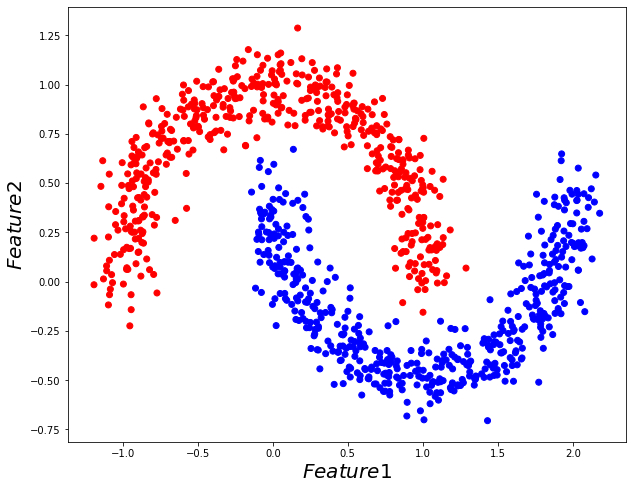

In [3]:
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
plt.figure(figsize = (10, 8));
plt.scatter(feature[:,0],feature[:,1], c=target, cmap=cm_bright);
plt.xlabel("$Feature1$", fontsize=20);
plt.ylabel("$Feature2$", fontsize=20);
plt.show();

### Test and train

In [4]:
X_trn, X_tst, y_trn, y_tst = train_test_split(feature, target,random_state=8)

### SVM with polynomial kernel

In [5]:
clf_poly = SVC(kernel='poly', C=1.0, gamma=0.1)
start = time()
clf_poly.fit(X_trn, y_trn)
print("Polynomial Kernel Train Fit Time: {} s".format(time() - start))
start = time()
clf_poly.predict(X_tst)
print("Polynomial Kernel Predict Fit Time: {} s".format(time() - start))
print('Test Accuracy:',accuracy_score(y_tst, clf_poly.predict(X_tst)))

Polynomial Kernel Train Fit Time: 0.009994745254516602 s
Polynomial Kernel Predict Fit Time: 0.0019981861114501953 s
Test Accuracy: 0.72


### Transforming the data

In [6]:
transformed_data =np.array([feature[:,0]**2,feature[:,1]*feature[:,0]**2,feature[:,1]**2]).T

### Lets plot the transformed data

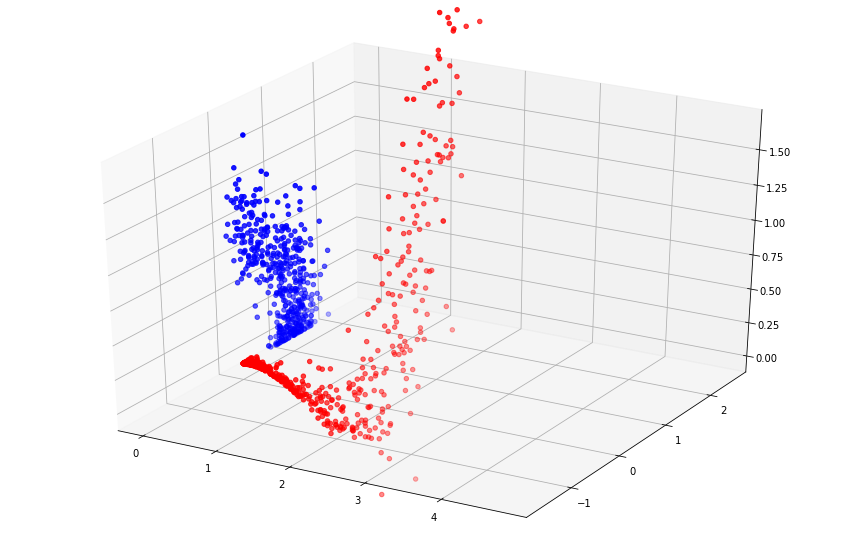

In [7]:
X1 = transformed_data[:,0]
X2 = transformed_data[:,1]
X3 = transformed_data[:,2]
fig = plt.figure(figsize = (15, 10));
ax = plt.axes(projection='3d')
ax.scatter(X1[target==0],X2[target==0],X3[target==0],c='blue',zdir='-y');
ax.scatter(X1[target==1],X2[target==1],X3[target==1],c='red',zdir='-x');

### Train and test from transformed data

In [8]:
X_train_tran, X_test_tran, y_train_tran, y_test_tran = train_test_split(transformed_data, target, random_state=8)

### SVM on transformed data without kernel

In [9]:
clf = SVC(C=1.0, gamma=0.1)
start = time()
clf.fit(X_train_tran, y_train_tran)
print("Transformed data with Linear Kernel Train Fit Time: {} s".format(time() - start))
start = time()
clf.predict(X_test_tran)
print("Transformed data with Linear Kernel Predict Time: {} s".format(time() - start))
print('Test Accuracy:',accuracy_score(y_test_tran, clf.predict(X_test_tran)))

Transformed data with Linear Kernel Train Fit Time: 0.005009651184082031 s
Transformed data with Linear Kernel Predict Time: 0.0009872913360595703 s
Test Accuracy: 0.992
